In [1]:
pip install pmdarima

  Using cached https://files.pythonhosted.org/packages/d3/b8/0295767de22ac446faa0fa596e06112eedb498f897682dd338fb4bf035c2/pmdarima-1.8.0-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
daily_acc = pd.read_csv('arp_DailyAccidents_sixCities_Month.csv', index_col=[0],parse_dates=[0])

In [3]:
daily_acc.head()

,Accidents
Date,
2016-04-01,2
2016-05-01,1
2016-06-01,2349
2016-07-01,5965
2016-08-01,7289


In [4]:
daily_acc.shape

(51, 1)

In [5]:
#daily_acc.describe()

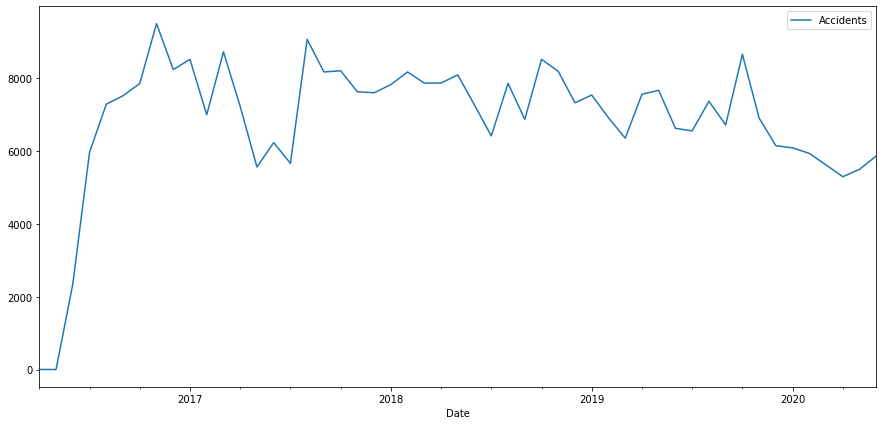

In [5]:
daily_acc.plot(figsize=(15,7))
plt.show()

In [7]:
# daily_acc_mean = daily_acc.rolling(window = 30).mean()
# daily_acc_mean.plot(figsize=(10,7))
# plt.show()

### 1. Baseline Model

In [9]:
daily_acc_series= daily_acc.values

In [10]:
value =pd.DataFrame(daily_acc_series)

In [11]:
d_accDF = pd.concat([value,value.shift(1)],axis=1)

In [12]:
d_accDF.head(3)

,0,0
0,2,NaN
1,1,2.0
2,2349,1.0


In [13]:
d_accDF.columns = ('Actual_Accidents','Forecast_Accident')

In [14]:
d_accDF.head()

,Actual_Accidents,Forecast_Accident
0,2,NaN
1,1,2.0
2,2349,1.0
3,5965,2349.0
4,7289,5965.0


In [15]:
d_accDF.dropna(inplace=True)

In [16]:
acc_err = mean_squared_error(d_accDF.Actual_Accidents,d_accDF.Forecast_Accident)
acc_err

1386461.4

In [17]:
print('RMSE: ', np.sqrt(acc_err))

RMSE:  1177.480955259999


In [18]:
print('R-Squared score: ', r2_score(d_accDF.Actual_Accidents,d_accDF.Forecast_Accident))

R-Squared score:  0.4403516273560495


### 2. Auto ARIMA Model

In [6]:
# Importing auto_arima 
from pmdarima.arima import auto_arima

In [7]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(daily_acc)

(0.01, False)

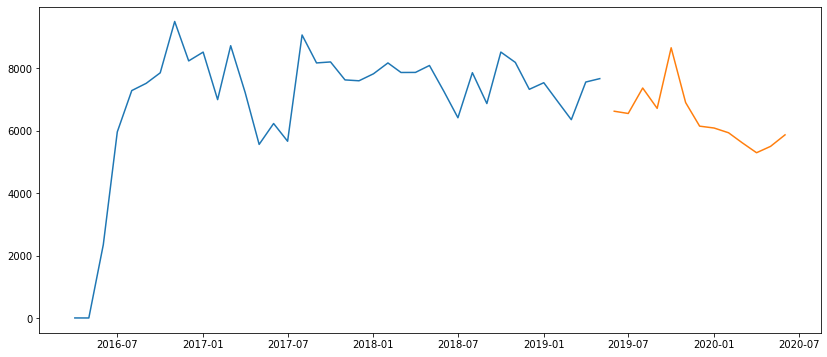

In [9]:
size = int(len(daily_acc) * 0.75)
train = daily_acc[0:size] 
test = daily_acc[size:len(daily_acc)]

plt.figure(figsize=(14,6))
plt.plot(train)
plt.plot(test)
plt.show()

In [10]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=440.530, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=439.172, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=442.199, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=437.281, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=439.184, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(

In [11]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   38
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -216.641
Date:                            Thu, 28 Jan 2021   AIC                            437.281
Time:                                    16:17:52   BIC                            439.719
Sample:                                         0   HQIC                           437.958
                                             - 38                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4359      0.139     -3.128      0.002      -0.709      -0.163
sigma2      2.034e+06   7.53e+05      2.701      0.007    5.58e+05    3.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.36   Prob(JB):                         0.73
Heteroskedasticity (H):               0.36   Skew:                             0.12
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
prediction1 = pd.DataFrame(arima_model.predict(n_periods = 13),index=test.index)
prediction1.columns = ['predicted_acc']
prediction1

,predicted_acc
Date,
2019-06-01,7494.782885
2019-07-01,6771.078936
2019-08-01,9070.226950
2019-09-01,8121.761489
2019-10-01,9066.547683
2019-11-01,8628.763145
2019-12-01,8129.702285
2020-01-01,8346.932548
2020-02-01,8146.019713


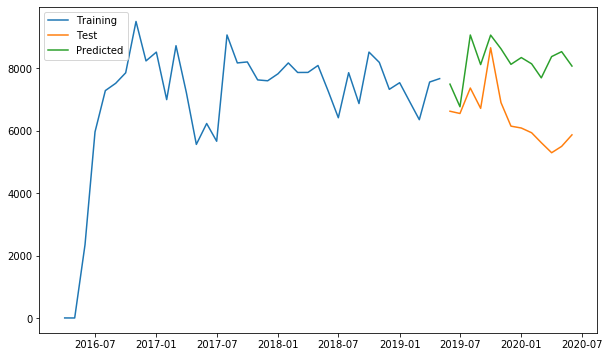

In [14]:
plt.figure(figsize=(10,6))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction1,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [21]:
from sklearn.metrics import r2_score
test['predicted_acc'] = prediction1
r2_score(test['Accidents'], test['predicted_acc'])

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-3.679650448280735

In [19]:
test

,Accidents,predicted_acc
Date,,
2018-11-01,8192,7040.767594
2018-12-01,7329,7426.494586
2019-01-01,7541,6943.695554
2019-02-01,6916,7135.673592
2019-03-01,6356,6706.235780
2019-04-01,7563,7224.481291
2019-05-01,7672,6763.127758
2019-06-01,6627,6369.878369
2019-07-01,6555,6913.445155


In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

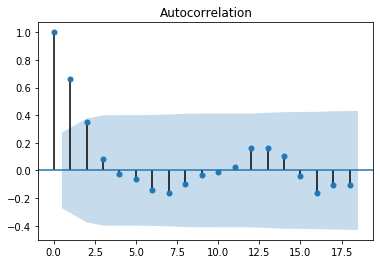

In [16]:
#plot_acf is to determine Q

plot_acf(daily_acc)
plt.show()

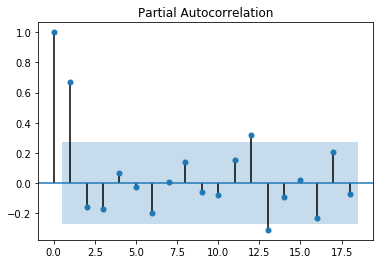

In [17]:
#determine the value of P

plot_pacf(daily_acc)
plt.show()

In [18]:

size = int(len(daily_acc) * 0.80)
train = daily_acc[0:size] 
test = daily_acc[size:len(daily_acc)]

#print(train.size,test.size)

In [21]:
#9,1,5 rmse=89. r2 =32 --9,2,6 rmse=88 r2 =34
from statsmodels.tsa.arima_model import ARIMA
acc_model = ARIMA(train,order=(1,2,1))

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [22]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

acc_model_fit = acc_model.fit()

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [23]:
test.size

11

In [24]:
acc_forecast = acc_model_fit.forecast(steps=11)[0]

In [25]:
print('RMSE: ',np.sqrt(mean_squared_error(test,acc_forecast)))

RMSE:  3454.464346649912


In [26]:
acc_forecast_df = pd.DataFrame(acc_forecast, index=test.index)

In [27]:
acc_forecast_df.rename(columns={0:'Predictions'},inplace=True)

In [28]:
prediction_df= acc_forecast_df
test_df= test

test_prediction= test_df.join(prediction_df, on='Date')
test_prediction.head(10)

,Accidents,Predictions
Date,,
2019-08-01,7371,6061.090858
2019-09-01,6719,5587.322863
2019-10-01,8661,5076.356670
2019-11-01,6905,4535.629895
2019-12-01,6149,3964.177789
2020-01-01,6089,3362.125491
2020-02-01,5937,2729.456769
2020-03-01,5619,2066.173729
2020-04-01,5297,1372.276097


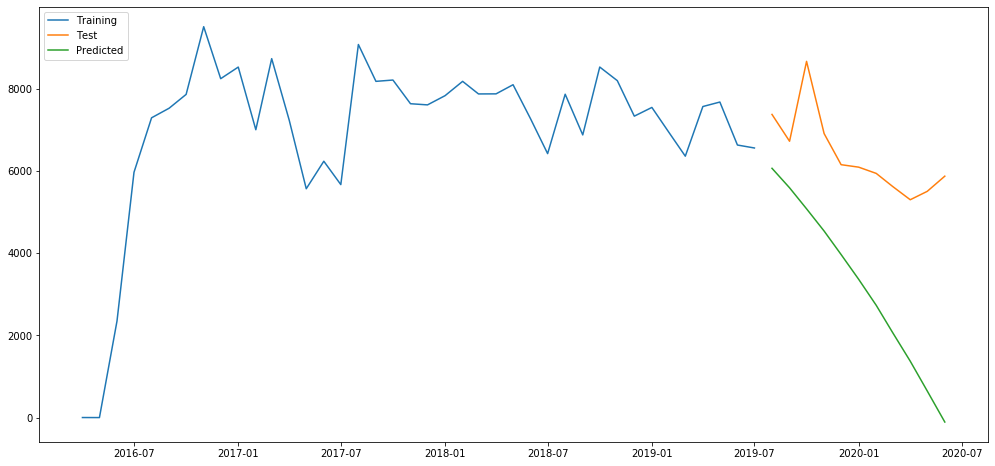

In [29]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(acc_forecast_df,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [33]:
print('R-Squared score: ',r2_score(test,acc_forecast))

R-Squared score:  -6.952048759185821


In [35]:
#f1_score(test, acc_forecast)

In [36]:
from sklearn.metrics import f1_score

In [35]:
from pmdarima.arima import auto_arima

In [36]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [37]:
arima_m = auto_arima(train,start_p=0, d=1, start_q=0, max_p=3, max_d=3, max_q=3,
                     start_P=0, D=1, start_Q=0, max_P=3, max_D=3, max_Q=3, m=12,
                     seasonal=True, stepwise=True, suppress_warnings=True,error_action='warn',
                     trace=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=473.818, Time=0.50 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=472.340, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=475.448, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=471.807, Time=0.32 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=473.797, Time=0.47 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=473.748, Time=0.67 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=472.220, Time=0.12 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=475.759, Time=1.15 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=471.893, Time=0

In [38]:
arima_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -231.903
Date:                            Tue, 19 Jan 2021   AIC                            471.807
Time:                                    00:03:22   BIC                            476.990
Sample:                                         0   HQIC                           473.348
                                             - 40                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0680      0.190     -0.358      0.720      -0.440       0.304
ar.S.L12      -0.5250      0.206     -2.545      0.011      -0.929      -0.121
ar.S.L24      -0.4133      0.216     -1.912      0.056      -0.837       0.010
sigma2      1.647e+06   6.64e+05      2.481      0.013    3.46e+05    2.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.42   Prob(JB):                         0.83
Heteroskedasticity (H):               0.38   Skew:                             0.14
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
predictn = pd.DataFrame(arima_m.predict(n_periods = 11), index=test.index)
predictn.columns =['predictionx']
predictn

,predictionx
Date,
2019-08-01,8243.418547
2019-09-01,7764.763209
2019-10-01,8691.362428
2019-11-01,9150.079665
2019-12-01,8214.584633
2020-01-01,8456.855597
2020-02-01,7569.357221
2020-03-01,7983.354041
2020-04-01,7937.406843


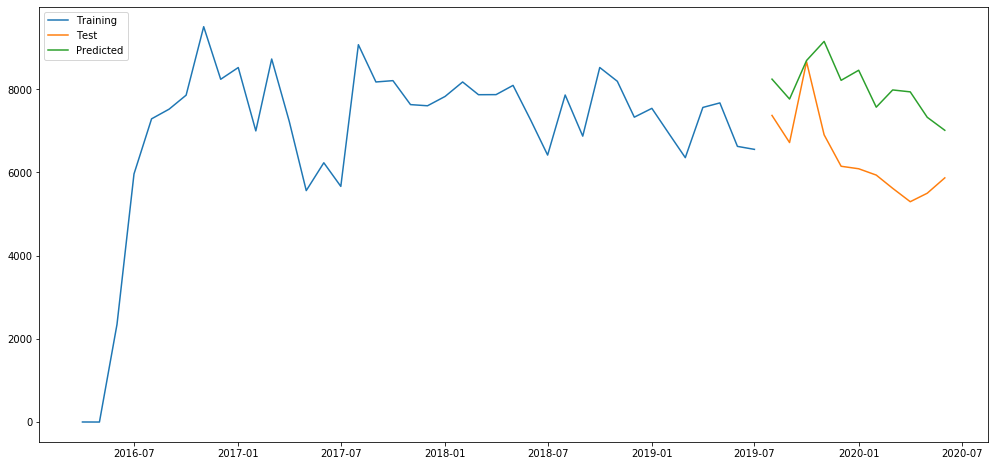

In [43]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(predictn,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [44]:
print('R-Squared score: ',r2_score(test,predictn))

R-Squared score:  -2.779043014423875
